# Data Science Workshop: Data Analysis with Python

#### Learning the basics of Data Analysis using Python, Numpy and Pandas

By [Trouni Tiet](https://linkedin.com/in/trouni) for [Le Wagon Tokyo](https://www.lewagon.com/tokyo)

## Introduction about this notebook

A Jupyter Notebook (or Colab Notebook) is a document format that combines the strengths of a word processor, a spreadsheet software and most importantly, a code editor/environment. **This notebook document allows executable code and nicely formatted text, tables and charts to live side-by-side.** Python code can be written and executed within a clear and detailed context describing the thought process and implementation of a data science project.

### Why not Excel for Data Science?

![When Excel crashes...](assets/excelcrash.jpg "When Excel crashes...")

- Excel can't work with large datasets (try to open [one of these dataset](https://www.who.int/healthinfo/statistics/mortality_rawdata/en/) with 2M+ rows)
- Painful to combine multiple files in Excel (now try to concatenate two of the datasets above!)
- Pull data from the web/APIs
- Python!

### How does this notebook work?

The cell below is a code cell. To run the code within it, first select it then click the play icon on the left, or **simply hit `[shift] + [enter]`**.

In [0]:
print("That is some fancy piece of code!")
print("1 + 1 makes", 1 + 1)

You have just executed some Python code! Below the code cell, you should have the following result:
> ```
That is some fancy piece of code!
1 + 1 makes 2
```

Please note that the code in a cell is only executed when you run the cell, which means you can choose to run cells in the notebook in any order that you wish. It means the physical order of where the code appears in the notebook does not necessarily determine the order of when it is run. Because the variables in your coding environment change everytime a cell is run, the same cell may return different results depending on the order of execution.

> **Make sure to run each cell while you go through this notebook.**

If you think you are not getting the expected results and would like to reset your notebook, just click in the toolbar on `Runtime > Restart runtime...`. Then execute each cell in order of appearance in the document, from top to bottom.

And now...

## Let's get started!

The cell below imports Python libraries that we will be using in our project. They allow us to utilize useful functions to process and analyse our data.

Basically every data science notebook will start with a cell like that one. Make sure you run it first!

> **Reminder:**  
> Select the cell and press `[shift] + [enter]` to run it.

In [119]:
import numpy as np                   # Python Math library
import pandas as pd                  # Python Data Analysis library  
%matplotlib inline
from matplotlib import pyplot   # Library to plot charts

### How to find a dataset?

There are a lot of great sources to obtain data on the web. For example, many datasets are available on [Kaggle](https://www.kaggle.com/datasets) and [GitHub](https://github.com/awesomedata/awesome-public-datasets)

Today, we will be working with this dataset by Johns Hopkins CSSE ([2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository](https://github.com/CSSEGISandData/COVID-19)) which contains daily updated numbers on the COVID-19 outbreak. This dataset is publicly available on GitHub.

### Importing data from the web

This is a good way to showcase how useful notebooks can be in comparison to a traditional spreadsheet... We can very simply write a few lines of Python code to **automatically download our dataset from the web or APIs**. In this case, we are downloading csv files from a GitHub repository. Even though are updated daily, we can simply re-run the cell to fetch the latest version of the data.

In [3]:
import os, requests

# The csv files we will download from GitHub
filenames = ["time_series_19-covid-Confirmed.csv", "time_series_19-covid-Deaths.csv", "time_series_19-covid-Recovered.csv"]
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

# Creating a /data directory for our notebook
if not os.path.exists('data'):
    os.mkdir('data')

# Downloading the csv files in /data
for filename in filenames:
    print(f"Downloading {filename}...")
    r = requests.get(url + filename, allow_redirects=True)
    open('data/' + filename, 'wb').write(r.content)
    
print("Download complete.")

Download complete.


## Our first DataFrame

A DataFrame is a pandas object that we can manipulate using pandas functions. Think of it like a code representation of an excel spreadsheet.

Let's create a DataFrame by loading our first CSV file into our notebook! You can do this with the `read_csv` function.

```python
filepath = "data/time_series_19-covid-Recovered.csv"
recovered_df = pd.read_csv(filepath)
```

In [76]:
### TODO ###
# Open "data/time_series_19-covid-Recovered.csv" using pd.read_csv(filepath).

filepath = "data/time_series_19-covid-Recovered.csv"
recovered_df = pd.read_csv(filepath)

Let's see what's in our newly created dataframe by calling the variable `recovered_df`:

In [77]:
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,72,88,105,127,157,193,221,255,280,361
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,37,44,48,56,69,80,98,108,114,122
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,51,66,79,102,128,152,184,207,225,254
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,35,39,45,53,57,63,71,82,90,93
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,16,17,24,31,39,39,49,54,58,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Diamond Princess cruise ship,Others,35.44370,129.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,"San Diego County, CA",US,32.71570,-117.1611,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,"San Antonio, TX",US,29.42410,-98.4936,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,NaN,Egypt,26.82060,30.8025,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Getting a feel for the dataset

You can get a basic idea about your DataFrame using these functions:
```python
dataframe.shape     # Returns the shape of your DataFrame (rows x columns)
dataframe.columns   # Returns the list of columns
dataframe.dtypes    # Returns the datatypes of each column
```

In [71]:
### TODO ###
# Play around and display the shape, columns and datatypes of recovered_df.

recovered_df.shape
# recovered_df.columns
# recovered_df.dtypes

(76, 32)

Show the first rows using `.head()` and the last rows using `.tail()`. For example:
```python
dataframe.head()      # Returns the first 5 rows by default
dataframe.tail(20)    # Returns the last 20 rows
```

In [69]:
### TODO ###
# Display the last 10 rows of recovered_df.

recovered_df.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
66,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
67,"Boston, MA",US,42.3601,-71.0589,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,"San Benito, CA",US,36.5761,-120.9876,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,NaN,Belgium,50.5039,4.4699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
70,"Madison, WI",US,43.0731,-89.4012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,Diamond Princess cruise ship,Others,35.4437,129.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,"San Diego County, CA",US,32.7157,-117.1611,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,"San Antonio, TX",US,29.4241,-98.4936,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,NaN,Egypt,26.8206,30.8025,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,"Omaha, NE",US,41.2545,-95.9758,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring the data

### Getting rows

You can use Python's slice syntax to get rows of a DataFrame. For example:
```python
dataframe[5:10]   # Returns rows 5 to 9
dataframe[:20]    # Returns the first 20 rows (0 to 19)
dataframe[::3]    # Returns every third row
```

**Note:** You can also use negative indexes in Python to count from the end of your slice.

In [37]:
### TODO ###
# Display the last 20 rows of the recovered_df DataFrame.

recovered_df[-20:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
56,NaN,United Arab Emirates,23.4241,53.8478,0,0,0,0,0,0,...,0,0,0,1,1,1,3,4,4,4
57,NaN,Philippines,12.8797,121.7740,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
58,NaN,India,20.5937,78.9629,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,3
59,"London, ON",Canada,42.9849,-81.2453,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
60,NaN,Italy,41.8719,12.5674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,NaN,UK,55.3781,-3.4360,0,0,0,0,0,0,...,0,0,0,1,1,1,1,8,8,8
62,NaN,Russia,61.5240,105.3188,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2
63,NaN,Sweden,60.1282,18.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,"Santa Clara, CA",US,37.3541,-121.9552,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,NaN,Spain,40.4637,-3.7492,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2


### Getting columns

DataFrames have similarities with dictionaries (objects/hashes). You can retrieve a column using:

```python
dataframe[['Column Name']]
# Note the double []. Columns are passed as a list.
```


`dataframe[['Column Name']]` will return a DataFrame, whereas `dataframe['Column Name']` will return a different pandas Object type: a Series.

In [14]:
### TODO ###
# Get the 'Province/State' and 'Country/Region' columns.

recovered_df[['Province/State', 'Country/Region']]

,Province/State,Country/Region
0,Anhui,Mainland China
1,Beijing,Mainland China
2,Chongqing,Mainland China
3,Fujian,Mainland China
4,Gansu,Mainland China
...,...,...
71,Diamond Princess cruise ship,Others
72,"San Diego County, CA",US
73,"San Antonio, TX",US
74,NaN,Egypt


### Getting a cell

You can get the value from a specific cell using `.loc[]`:

```python
dataframe.loc[row_indexer, column_indexer]
```

In [42]:
### TODO ###
# Retrieve the latitude of the Diamond Princess cruise ship (row 71).

recovered_df.loc[71, "Lat"]

35.4437

### Filtering rows

#### Boolean indexing

We first start by creating a condition on a column, in order to create a boolean mask. Think of this mask as an array mapping each position of your column with either True or False depending on the condition.

```python
recovered_df["Country/Region"] == "Japan"
```

In [43]:
### TODO ###
# Create a boolean mask for the rows with "Mainland China" as the "Country/Region".

recovered_df["Country/Region"] == "Mainland China"

0      True
1      True
2      True
3      True
4      True
      ...  
71    False
72    False
73    False
74    False
75    False
Name: Country/Region, Length: 76, dtype: bool

We call this a boolean **mask** because we can now apply this mask to our dataframe and it will only return the rows that were marked True. The other rows (marked False) are now **masked out**.

In [44]:
### TODO ###
# Apply the mask to recovered_df.

mask = recovered_df["Country/Region"] == "Mainland China"
recovered_df[mask]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
0,Anhui,Mainland China,31.82571,117.22640,0,0,0,0,0,0,...,72,88,105,127,157,193,221,255,280,361
1,Beijing,Mainland China,40.18238,116.41420,0,0,1,2,2,2,...,37,44,48,56,69,80,98,108,114,122
2,Chongqing,Mainland China,30.05718,107.87400,0,0,0,0,0,0,...,51,66,79,102,128,152,184,207,225,254
3,Fujian,Mainland China,26.07783,117.98950,0,0,0,0,0,0,...,35,39,45,53,57,63,71,82,90,93
4,Gansu,Mainland China,36.06110,103.83430,0,0,0,0,0,0,...,16,17,24,31,39,39,49,54,58,62
5,Guangdong,Mainland China,23.33841,113.42200,0,2,2,2,2,4,...,141,167,212,275,314,362,410,465,524,565
6,Guangxi,Mainland China,23.82908,108.78810,0,0,0,0,0,0,...,18,24,33,32,33,36,44,49,53,69
7,Guizhou,Mainland China,26.81536,106.87480,0,0,0,0,0,0,...,7,10,17,18,27,28,41,46,57,66
8,Hainan,Mainland China,19.19673,109.74550,0,0,0,0,0,0,...,19,19,20,27,30,43,39,52,59,79
9,Hebei,Mainland China,38.04280,114.51490,0,0,0,0,0,0,...,34,41,48,54,68,87,101,105,122,136


**Note:** You can use `.str.contains()` to partially match the content of a cell. For example:
```python
f_mask = recovered_df["Country/Region"].str.contains("F")
recovered_df[f_mask]
# Will return rows from all countries containing "F"
# Start your string with '(?i)' to make the search case insensitive
```



In [45]:
### TODO ###
# Get the rows of all countries containing the letter "t" (case insensitive).

f_mask = recovered_df["Country/Region"].str.contains("(?i)t")
recovered_df[f_mask]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
31,NaN,Thailand,13.7563,100.5018,0,0,0,0,2,2,...,10,10,10,10,12,12,12,14,15,15
33,NaN,South Korea,37.5665,126.9780,0,0,0,0,0,0,...,3,3,3,7,7,7,9,9,10,12
34,Taiwan,Taiwan,23.6978,120.9605,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
41,NaN,Vietnam,21.0278,105.8342,0,0,0,0,0,0,...,1,1,6,6,7,7,7,7,7,7
49,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,2,2,2,2,4,4,4,4,4,4
50,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,0,0,0,0,4,4,4,4,4,4
51,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,NaN,United Arab Emirates,23.4241,53.8478,0,0,0,0,0,0,...,0,0,0,1,1,1,3,4,4,4
60,NaN,Italy,41.8719,12.5674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


**Note:** You can use `.isin()` to match row values from within a list.
```python
isin_mask = recovered_df["Country/Region"].isin(["Japan", "US"])
recovered_df[isin_mask]
```

In [46]:
### TODO ###
# Create a mask to filter countries from this list: "Australia", "France", "Singapore".

isin_mask = recovered_df["Country/Region"].isin(["Australia", "France", "Singapore"])
recovered_df[isin_mask]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
40,NaN,Singapore,1.3521,103.8198,0,0,0,0,0,0,...,2,2,9,15,15,17,18,18,24,29
42,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,0,0,0,2,2,2,4,4,4,4
49,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,2,2,2,2,4,4,4,4,4,4
50,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,0,0,0,0,4,4,4,4,4,4
51,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


### Filtering columns

In addition to directly selecting multiple columns, you can also filter specific columns from your dataframe using:
- `.filter(items=['Column Name'])`
- `.filter(regex="...")`

In [47]:
### TODO ###
# Display only these columns: "Province/State", "Country/Region", "Lat" and "Long".

recovered_df.filter(["Province/State", "Country/Region", "Lat", "Long"])

,Province/State,Country/Region,Lat,Long
0,Anhui,Mainland China,31.82571,117.2264
1,Beijing,Mainland China,40.18238,116.4142
2,Chongqing,Mainland China,30.05718,107.8740
3,Fujian,Mainland China,26.07783,117.9895
4,Gansu,Mainland China,36.06110,103.8343
...,...,...,...,...
71,Diamond Princess cruise ship,Others,35.44370,129.6380
72,"San Diego County, CA",US,32.71570,-117.1611
73,"San Antonio, TX",US,29.42410,-98.4936
74,NaN,Egypt,26.82060,30.8025


In [48]:
### TODO ###
# Display all the date columns using a regular expression.
# Hint: The names of all these columns end with "20".

recovered_df.filter(regex="20$")

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
0,0,0,0,0,0,0,0,2,2,3,...,72,88,105,127,157,193,221,255,280,361
1,0,0,1,2,2,2,4,4,4,5,...,37,44,48,56,69,80,98,108,114,122
2,0,0,0,0,0,0,0,1,1,1,...,51,66,79,102,128,152,184,207,225,254
3,0,0,0,0,0,0,0,0,0,0,...,35,39,45,53,57,63,71,82,90,93
4,0,0,0,0,0,0,0,0,0,0,...,16,17,24,31,39,39,49,54,58,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cleaning up & Formatting the data

### Re-indexing

You can re-index your dataframe using `.set_index()`.
```python
DataFrame.set_index('Column Name')
```

In [49]:
### TODO ###
# Set the 'Country/Region' column as the index.

recovered_df.set_index('Country/Region')

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,31.82571,117.2264,0,0,0,0,0,0,0,...,72,88,105,127,157,193,221,255,280,361
Mainland China,Beijing,40.18238,116.4142,0,0,1,2,2,2,4,...,37,44,48,56,69,80,98,108,114,122
Mainland China,Chongqing,30.05718,107.8740,0,0,0,0,0,0,0,...,51,66,79,102,128,152,184,207,225,254
Mainland China,Fujian,26.07783,117.9895,0,0,0,0,0,0,0,...,35,39,45,53,57,63,71,82,90,93
Mainland China,Gansu,36.06110,103.8343,0,0,0,0,0,0,0,...,16,17,24,31,39,39,49,54,58,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Others,Diamond Princess cruise ship,35.44370,129.6380,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US,"San Diego County, CA",32.71570,-117.1611,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US,"San Antonio, TX",29.42410,-98.4936,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Note:** You can now also filter rows using a RegEx on the index with `.filter(regex="...")`:
```python
recovered_df.set_index('Country/Region').filter(regex="^A", axis='rows')
```

### Remove rows or columns

Remove unused rows/columns using `.drop()`.
```python
dataframe.drop(rows, axis='rows')
dataframe.drop(columns, axis='columns')
```

In [56]:
### TODO ###
# Remove the latitude and longitude columns.

recovered_df.drop(["Province/State", "Lat", "Long"], axis='columns')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
0,Mainland China,0,0,0,0,0,0,0,2,2,...,72,88,105,127,157,193,221,255,280,361
1,Mainland China,0,0,1,2,2,2,4,4,4,...,37,44,48,56,69,80,98,108,114,122
2,Mainland China,0,0,0,0,0,0,0,1,1,...,51,66,79,102,128,152,184,207,225,254
3,Mainland China,0,0,0,0,0,0,0,0,0,...,35,39,45,53,57,63,71,82,90,93
4,Mainland China,0,0,0,0,0,0,0,0,0,...,16,17,24,31,39,39,49,54,58,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Others,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,US,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,US,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,Egypt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sorting

You can sort your rows using `.sort_index()` and `.sort_values()`:
- `dataframe.sort_index(ascending=True)`
- `dataframe.sort_values('Column Name', ascending=True)`

In [75]:
### TODO ###
# Sort the DataFrame by descending index.

recovered_df.sort_index(ascending=False)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
75,"Omaha, NE",US,41.25450,-95.9758,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,NaN,Egypt,26.82060,30.8025,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,"San Antonio, TX",US,29.42410,-98.4936,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,"San Diego County, CA",US,32.71570,-117.1611,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,Diamond Princess cruise ship,Others,35.44370,129.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,16,17,24,31,39,39,49,54,58,62
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,35,39,45,53,57,63,71,82,90,93
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,51,66,79,102,128,152,184,207,225,254
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,37,44,48,56,69,80,98,108,114,122


In [53]:
### TODO ###
# Get the 20 rows with the most recoveries on February 18th, 2020 (= 2/18/20).

recovered_df.sort_values('2/18/20', ascending=False).head(20)
recovered_df.sort_values('2/18/20', ascending=True).tail(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
7,Guizhou,Mainland China,26.81536,106.8748,0,0,0,0,0,0,...,7,10,17,18,27,28,41,46,57,66
6,Guangxi,Mainland China,23.82908,108.7881,0,0,0,0,0,0,...,18,24,33,32,33,36,44,49,53,69
8,Hainan,Mainland China,19.19673,109.7455,0,0,0,0,0,0,...,19,19,20,27,30,43,39,52,59,79
21,Shaanxi,Mainland China,35.19165,108.8701,0,0,0,0,0,0,...,25,30,32,43,46,54,60,71,79,89
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,35,39,45,53,57,63,71,82,90,93
10,Heilongjiang,Mainland China,47.86200,127.7622,0,0,0,0,0,0,...,14,30,28,31,33,47,68,79,85,111
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,37,44,48,56,69,80,98,108,114,122
9,Hebei,Mainland China,38.04280,114.5149,0,0,0,0,0,0,...,34,41,48,54,68,87,101,105,122,136
25,Sichuan,Mainland China,30.61714,102.7103,0,0,0,0,0,0,...,71,80,85,92,104,114,119,131,156,169
23,Shanghai,Mainland China,31.20327,121.4554,0,0,1,1,1,3,...,44,48,52,57,62,90,124,140,161,177


### Aggregating

You can perform functions on all rows or columns such as `.sum()`, `.count()` or `.average()`. By default, the function aggregates the rows of your DataFrame. You can specify `axis='columns'` as an argument to perform the function over the columns.

Examples:
```python
dataframe.count()
dataframe.sum(axis='columns')
dataframe.average(axis='rows')
```

You can refer to this list of [Numpy's statistics functions](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) for a more exhaustive list.

In [64]:
### TODO ###
# Get the total number of recoveries for each day.

recovered_df.sum()

Lat         2307.83937
Long        4374.78736
1/22/20       28.00000
1/23/20       30.00000
1/24/20       36.00000
1/25/20       39.00000
1/26/20       52.00000
1/27/20       61.00000
1/28/20      107.00000
1/29/20      126.00000
1/30/20      143.00000
1/31/20      222.00000
2/1/20       284.00000
2/2/20       472.00000
2/3/20       623.00000
2/4/20       852.00000
2/5/20      1124.00000
2/6/20      1487.00000
2/7/20      2011.00000
2/8/20      2616.00000
2/9/20      3244.00000
2/10/20     3946.00000
2/11/20     4683.00000
2/12/20     5150.00000
2/13/20     6295.00000
2/14/20     8058.00000
2/15/20     9395.00000
2/16/20    10865.00000
2/17/20    12583.00000
2/18/20    14352.00000
dtype: float64

### Grouping

To perform grouping you need to do the following steps:
1. **Split** the dataframe using `.groupby()`
2. **Apply** an aggregative function (*e.g.* `sum`, `count`, `mean`)

In [74]:
### TODO ###
# Get the total number of recoveries per country for each day.
# Hint: Group your data by country, then sum over the aggregated rows.

recovered_df.groupby('Country/Region').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,-134.08070,587.79820,0,0,0,0,0,0,0,0,...,2,2,2,2,8,8,8,8,10,10
Belgium,50.50390,4.46990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Cambodia,12.56570,104.99100,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
Canada,135.92080,-283.74950,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
Egypt,26.82060,30.80250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Finland,61.92410,25.74820,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
France,46.22760,2.21370,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,4,4,4,4
Germany,51.16570,10.45150,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,12
Hong Kong,22.31930,114.16940,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,2,2


## Combining everything

In [87]:
### TODO ###
# Do the following on the recovered_df DataFrame:
#   1. remove the 'Province/State', 'Lat' and 'Long' columns
#   2. group the rows by country
#   3. sum over all the aggregated rows
#   4. sort the values by decreasing number of recoveries on February 18th, 2020
#   5. only keep the first 20 rows

recovered_df.drop(["Province/State", "Lat", "Long"], axis=1) \
            .groupby('Country/Region') \
            .sum() \
            .sort_values('2/18/20', ascending=False) \
            .head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,28,30,36,39,49,58,101,120,135,214,...,3218,3917,4635,5079,6213,7973,9294,10748,12455,14199
Singapore,0,0,0,0,0,0,0,0,0,0,...,2,2,9,15,15,17,18,18,24,29
Thailand,0,0,0,0,2,2,5,5,5,5,...,10,10,10,10,12,12,12,14,15,15
Japan,0,0,0,0,1,1,1,1,1,1,...,1,4,9,9,9,9,12,12,12,13
Malaysia,0,0,0,0,0,0,0,0,0,0,...,1,1,3,3,3,3,7,7,7,13
South Korea,0,0,0,0,0,0,0,0,0,0,...,3,3,3,7,7,7,9,9,10,12
Germany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,12
Australia,0,0,0,0,0,0,0,0,2,2,...,2,2,2,2,8,8,8,8,10,10
UK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,8,8,8


## Plot charts

We can easily plot charts using `.plot()`. By default, a line chart will be plotted, but you can specify the chart type using `kind='bar'` for example.

### Recoveries outside of Mainland China

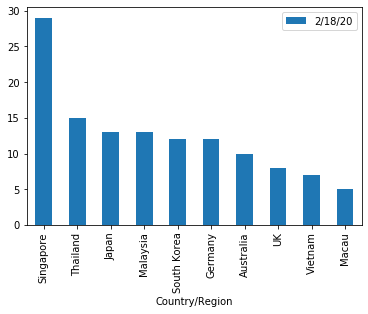

In [125]:
# Preparing the format of our data to be plotted
plot_data = recovered_df.groupby('Country/Region') \
            .sum() \
            [['2/18/20']] \
            .sort_values('2/18/20', ascending=False) \
            .drop('Mainland China') \
            .head(10) \

# Plotting our bar chart
plot_data.plot(kind='bar')

### Recoveries over time

Let's plot the total worldwide number of recoveries over time. We will also plot the number of deaths over time on the same chart.

#### Using functions

We can define functions within our notebook, in order to avoid repeating ourselves when pre-processing our datasets. In this specific instance, we want to plot two separate datasets (`recovered` and `deaths`). The CSVs have the same structure, so we can easily write a function to pre-process our data to be plotted.

In [115]:
def prepare(data):
    return data.drop(["Province/State", "Lat", "Long"], axis=1) \
               .set_index('Country/Region') \
               .sum()

# prepare(recovered_df)

To plot multiple series on the same chart, we use `pyplot.plot()`.

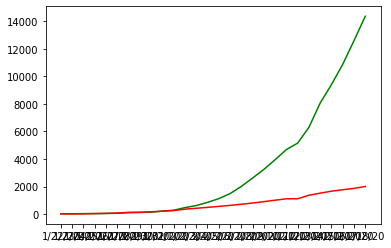

In [123]:
# Loading our deaths dataset
deaths_df = pd.read_csv("data/time_series_19-covid-Deaths.csv")

# Plotting our charts
pyplot.plot(prepare(recovered_df), color='g')
pyplot.plot(prepare(deaths_df), color='r')